In [1]:
import matplotlib.pyplot as plt                  
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
mpl.rcParams['font.size']=12

In [3]:
repository_path = '/global/cscratch1/sd/hongbo/ksz_lens/'
outplot_path = repository_path + 'output/draft_plot/'

In [4]:
lmin = 30
lmaxs = [3000, 4000]
experiments = ['Planck_SMICA', 'CMB_S3', 'CMB_S4']
experiment_names = ['Planck SMICA', 'CMB S3', 'CMB S4']
row, column = np.size(experiments), np.size(lmaxs)

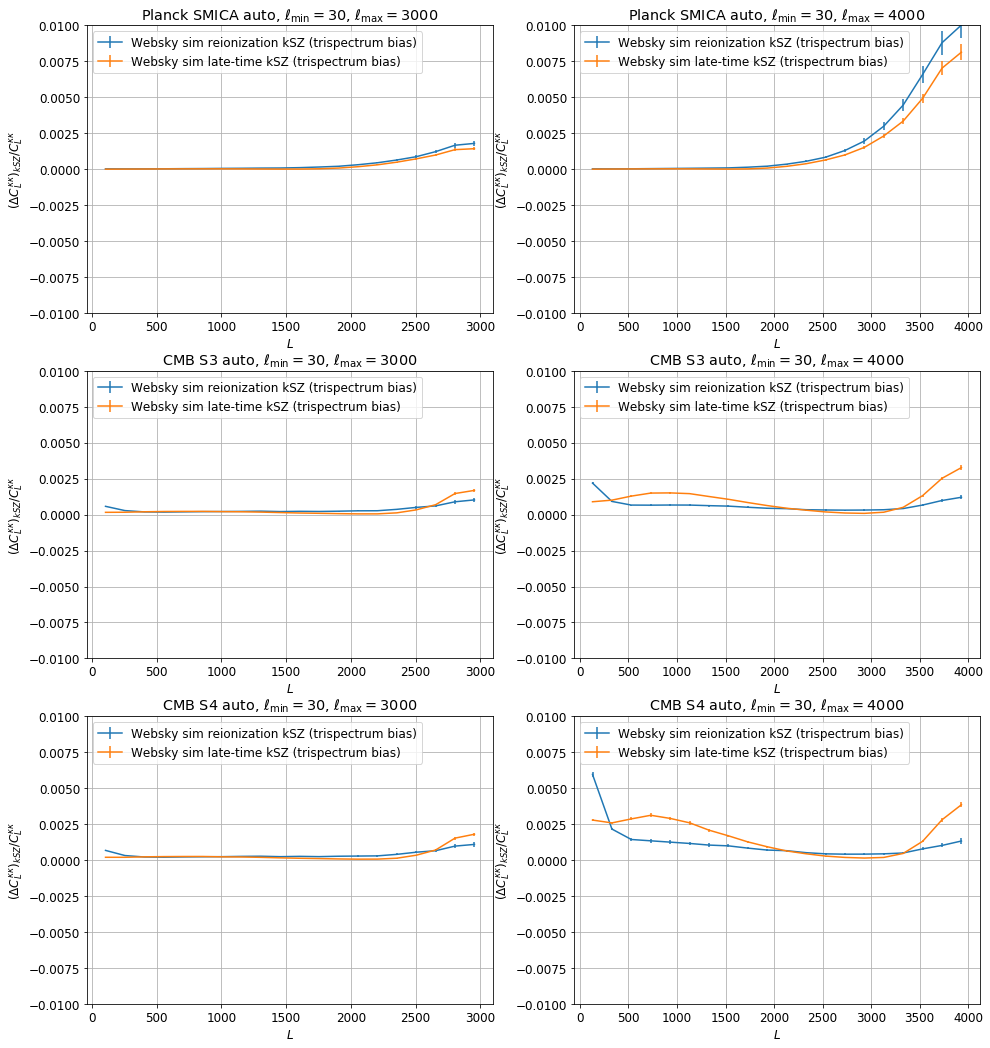

In [5]:
fig, ax = plt.subplots(row, column,figsize=(8*column,6*row))
map_source = 'websky'
save_plot = 'True'
for i in range(row):
    for j in range(column):
        data_path = repository_path + 'output/data36_ksz/'
        ksz_type = 'ri'
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], \
                                                              lmin, lmaxs[j]))
        ax[i,j].errorbar(Data['Ls'], Data['bias'], yerr=Data['reckap_x_reckap_err']/Data['inkap_x_inkap'],  \
                         label='Websky sim reionization kSZ (trispectrum bias)')
        
        
        ksz_type = 'lt'
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], \
                                                              lmin, lmaxs[j]))
        ax[i,j].errorbar(Data['Ls'], Data['bias'], yerr=Data['reckap_x_reckap_err']/Data['inkap_x_inkap'], \
                         label='Websky sim late-time kSZ (trispectrum bias)')
    
        
        ax[i,j].set_title(r'%s auto, ${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' \
                          %(experiment_names[i], lmin, lmaxs[j]))
        ax[i,j].set_xlabel('$L$')                                                                           
        ax[i,j].set_ylabel('$({\Delta}C_L^{\kappa \kappa})_{kSZ}/C_L^{\kappa \kappa}$')      
        ax[i,j].set_ylim([-0.01,  0.01])
        ax[i,j].grid()
        ax[i,j].legend(loc='upper left')
if save_plot:
    plt.savefig(outplot_path + map_source + '_.pdf')
    plt.savefig(outplot_path + map_source + '_.png')

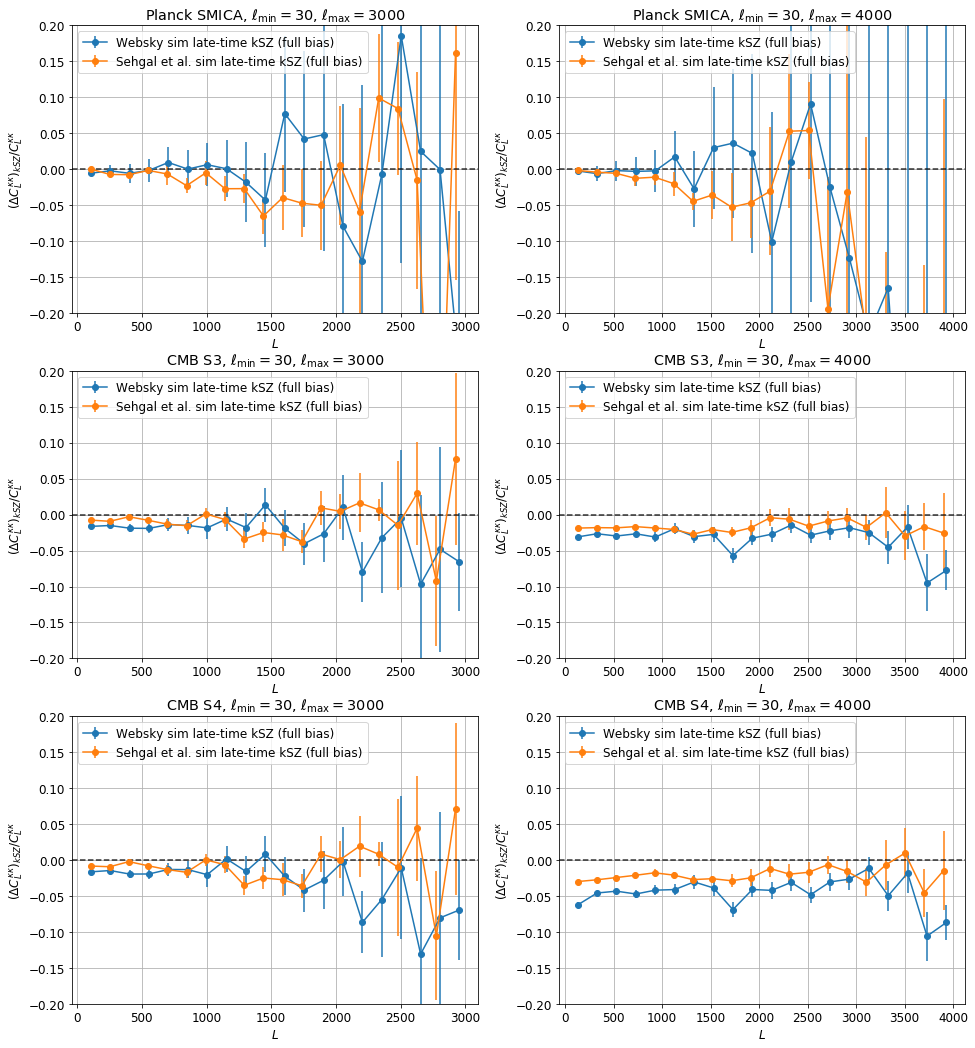

In [6]:
# addColin's result from Seghal's sims
fig, ax = plt.subplots(row, column,figsize=(8*column,6*row))
data_path = repository_path + 'output/data36/'
map_source = 'websky'
ksz_type = 'lt'
save_plot = 'True'        

#plt.suptitle('30 Gaussian realizations')
for i in range(row):
    for j in range(column):
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], \
                                                              lmin, lmaxs[j]))
        factor = Data['inkap_x_inkap']/Data['inkap_x_reckap']
        ax[i,j].errorbar(Data['Ls'], Data['bias'], yerr=Data['bias_err']/factor**2, label='Websky sim late-time kSZ (full bias)', marker='o', ls='-')
        
        Data = np.loadtxt('output/end2end_%s_lmax%s.txt' %(experiments[i], lmaxs[j]) )
        ax[i,j].set_title(r'%s, ${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' \
                          %(experiment_names[i], lmin, lmaxs[j]))
        ax[i,j].errorbar(Data[:, 0], Data[:, 1], yerr=Data[:,2], label='Sehgal et al. sim late-time kSZ (full bias)', marker='o', ls='-')
        ax[i,j].axhline(y=0,ls='--',alpha=0.8,color='k')
        
        ax[i,j].legend(loc='upper left')
        ax[i,j].set_ylim([-0.2,  0.2])
        ax[i,j].set_xlabel('$L$')                                                                        
        ax[i,j].set_ylabel('$({\Delta}C_L^{\kappa \kappa})_{kSZ}/C_L^{\kappa \kappa}$')      
        ax[i,j].grid()

if save_plot:
    plt.savefig(outplot_path + 'late_time_full_30_1' + '_.pdf')
    plt.savefig(outplot_path + 'late_time_full_30_1' + '_.png')

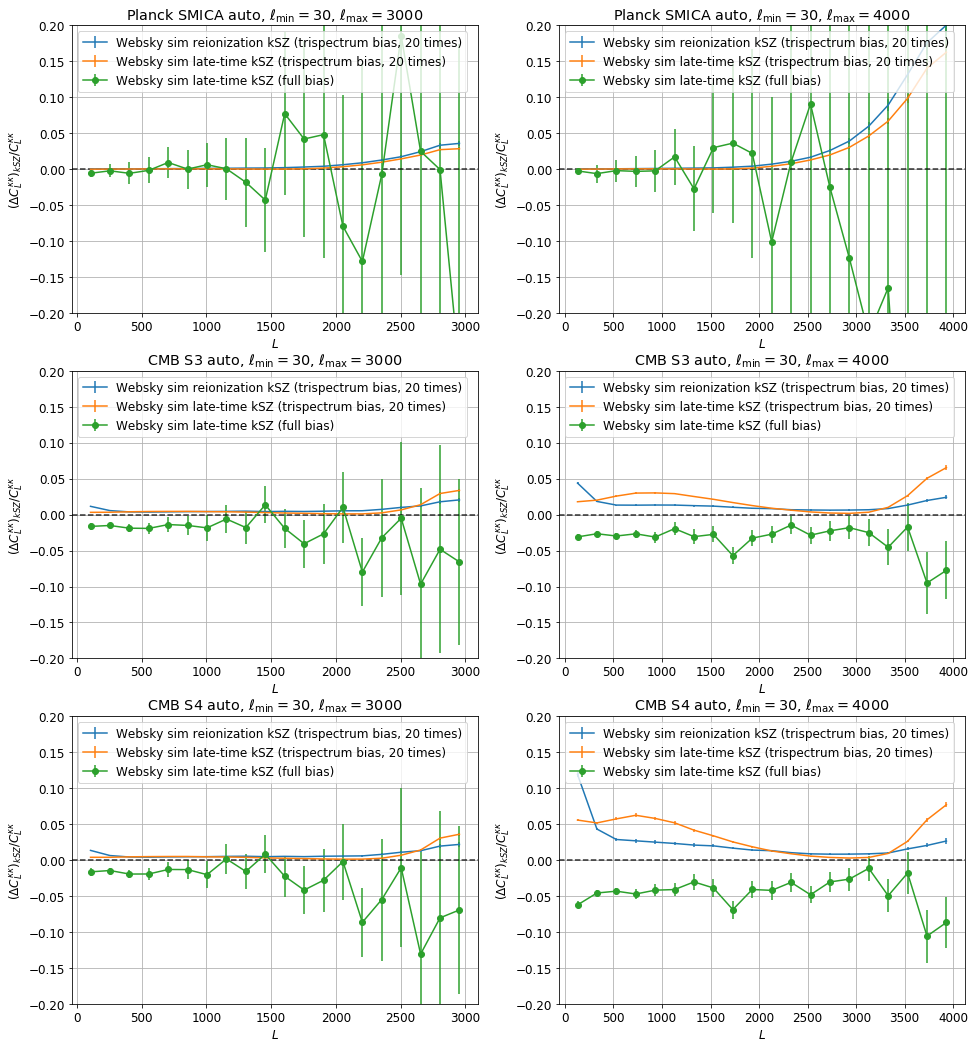

In [12]:
fig, ax = plt.subplots(row, column,figsize=(8*column,6*row))
save_plot = 'True'
for i in range(row):
    for j in range(column):
        data_path = repository_path + 'output/data36_ksz/'
        ksz_type = 'ri'
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], lmin, lmaxs[j]))
        ax[i,j].errorbar(Data['Ls'], 20*Data['bias'], yerr=20*Data['reckap_x_reckap_err']/Data['inkap_x_inkap'],  \
                         label='Websky sim reionization kSZ (trispectrum bias, 20 times)')
        
        ksz_type = 'lt'
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], lmin, lmaxs[j]))
        ax[i,j].errorbar(Data['Ls'], 20*Data['bias'], yerr=20*Data['reckap_x_reckap_err']/Data['inkap_x_inkap'], \
                         label='Websky sim late-time kSZ (trispectrum bias, 20 times)')
        ax[i,j].axhline(y=0,ls='--',alpha=0.8,color='k')
    
        
        data_path = repository_path + 'output/data36/'
        ksz_type = 'lt'
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], lmin, lmaxs[j]))
        ax[i,j].errorbar(Data['Ls'], Data['bias'], yerr=Data['bias_err'], \
                         label='Websky sim late-time kSZ (full bias)', marker='o', ls='-')
    
        
        ax[i,j].set_title(r'%s auto, ${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' \
                          %(experiment_names[i], lmin, lmaxs[j]))
        ax[i,j].set_xlabel('$L$')                                                                           
        ax[i,j].set_ylabel('$({\Delta}C_L^{\kappa \kappa})_{kSZ}/C_L^{\kappa \kappa}$')      
        ax[i,j].set_ylim([-0.2,  0.2])
        ax[i,j].grid()
#         ax[i,j].yscale('log')
        ax[i,j].legend(loc='upper left')

if save_plot:
    plt.savefig(outplot_path + '3curves_20times_1' + '_.pdf')
    plt.savefig(outplot_path + '3curves_20times_1' + '_.png')

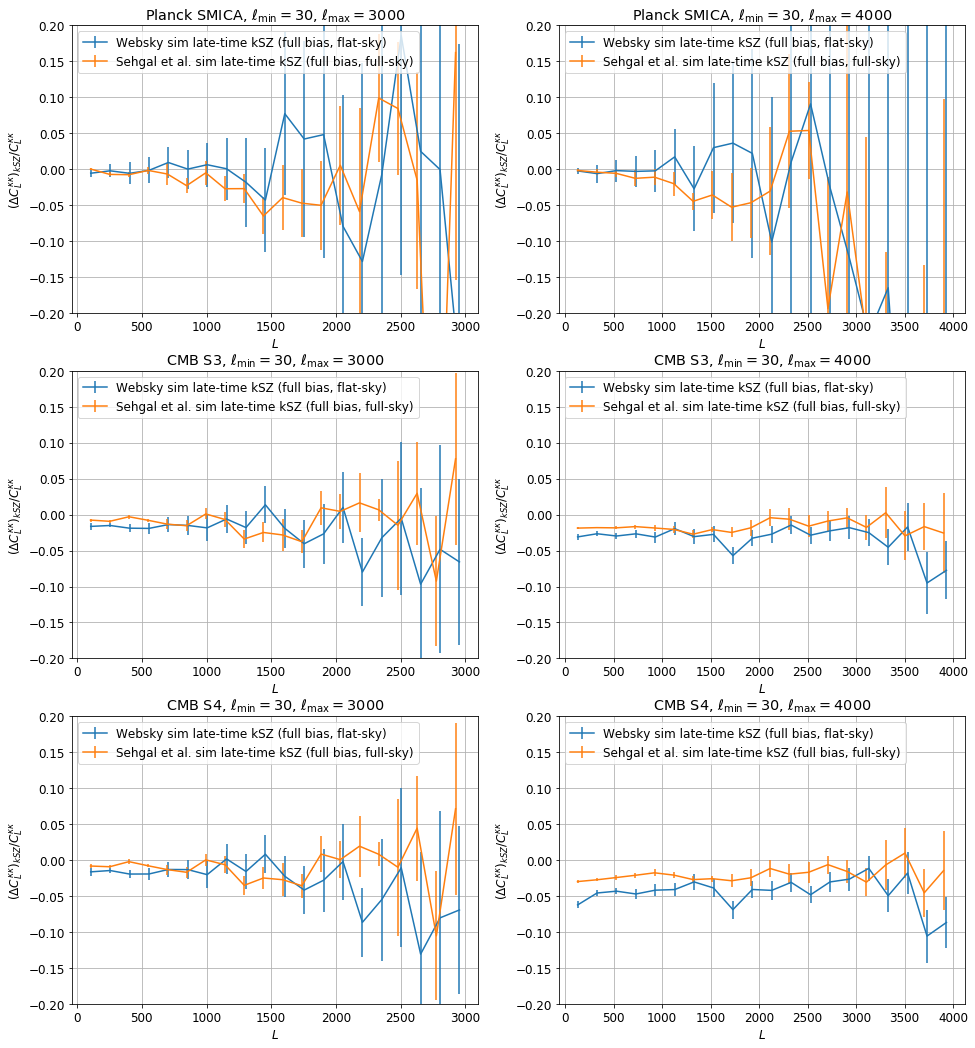

In [10]:
fig, ax = plt.subplots(row, column,figsize=(8*column,6*row))
data_path = repository_path + 'output/data36/'
map_source = 'websky'
ksz_type = 'lt'
save_plot = 'False'        

for i in range(row):
    for j in range(column):
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], \
                                                              lmin, lmaxs[j]))
        ax[i,j].errorbar(Data['Ls'], Data['bias'], yerr=Data['bias_err'], label='Websky sim late-time kSZ (full bias, flat-sky)')
        
        Data = np.loadtxt('output/end2end_%s_lmax%s.txt' %(experiments[i], lmaxs[j]) )
        ax[i,j].set_title(r'%s, ${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' \
                          %(experiment_names[i], lmin, lmaxs[j]))
        ax[i,j].errorbar(Data[:, 0], Data[:, 1], yerr=Data[:,2], label='Sehgal et al. sim late-time kSZ (full bias, full-sky)')
        
        
        ax[i,j].legend(loc='upper left')
        ax[i,j].set_ylim([-0.2,  0.2])
        ax[i,j].set_xlabel('$L$')                                                                        
        ax[i,j].set_ylabel('$({\Delta}C_L^{\kappa \kappa})_{kSZ}/C_L^{\kappa \kappa}$')      
        ax[i,j].grid()
        #ax[i,j].set_yscale('symlog')

if save_plot:
    plt.savefig(outplot_path + 'late_time_full' + '_.pdf')
    plt.savefig(outplot_path + 'late_time_full' + '_.png')

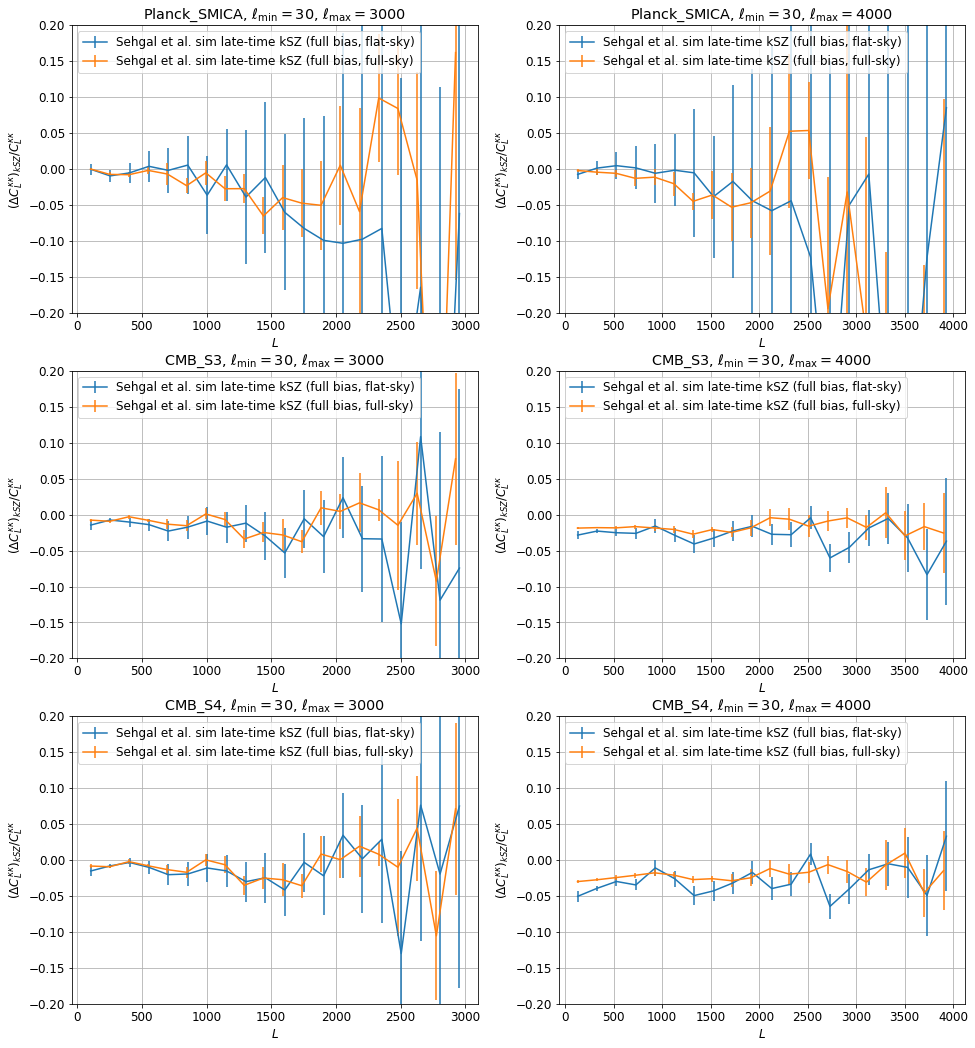

In [26]:
# addColin's result from Seghal's sims
fig, ax = plt.subplots(row, column,figsize=(8*column,6*row))
data_path = repository_path + 'output/data36/'
map_source = 'Colin'
ksz_type = 'lt'
save_plot = 'False'        

for i in range(row):
    for j in range(column):
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], \
                                                              lmin, lmaxs[j]))
        ax[i,j].errorbar(Data['Ls'], Data['bias'], yerr=Data['bias_err_test']/1.8, label='Sehgal et al. sim late-time kSZ (full bias, flat-sky)')
        
        Data = np.loadtxt('output/end2end_%s_lmax%s.txt' %(experiments[i], lmaxs[j]) )
        ax[i,j].set_title(r'%s, ${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' \
                          %(experiments[i], lmin, lmaxs[j]))
        ax[i,j].errorbar(Data[:, 0], Data[:, 1], yerr=Data[:,2], label='Sehgal et al. sim late-time kSZ (full bias, full-sky)')
        
        
        ax[i,j].legend(loc='upper left')
        ax[i,j].set_ylim([-0.2,  0.2])
        ax[i,j].set_xlabel('$L$')                                                                        
        ax[i,j].set_ylabel('$({\Delta}C_L^{\kappa \kappa})_{kSZ}/C_L^{\kappa \kappa}$')      
        ax[i,j].grid()

if save_plot:
    plt.savefig(outplot_path + 'late_time_full' + '_.pdf')
    plt.savefig(outplot_path + 'late_time_full' + '_.png')

/global/u2/h/hongbo/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
/global/u2/h/hongbo/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


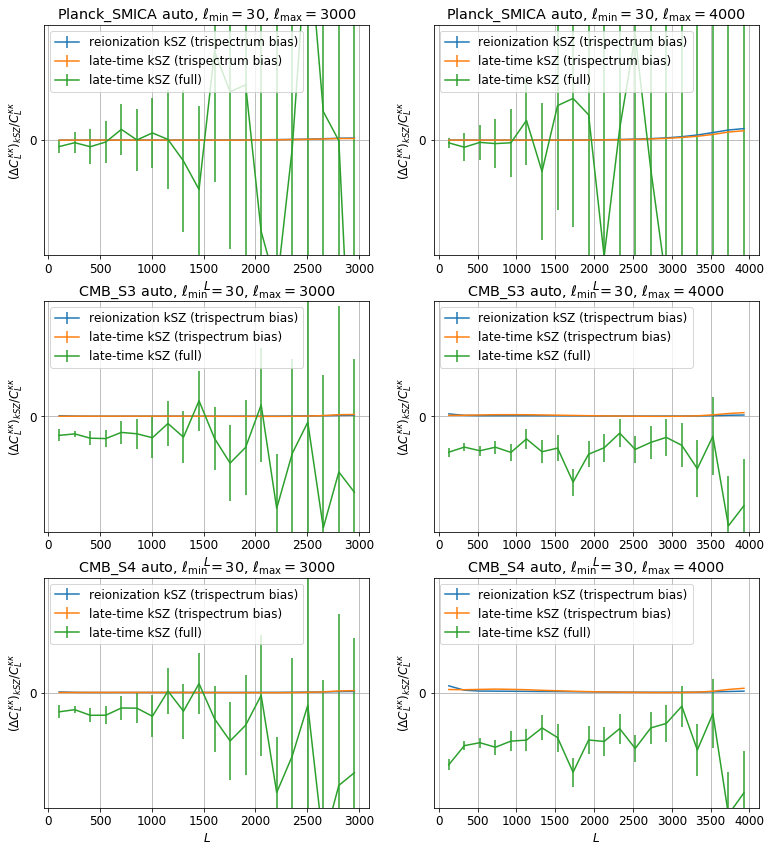

In [8]:
save_plot = 'False'
width, height = 6.4, 4.8
plt.figure(figsize=(2*width, 3*height))
for i in range(row):
    for j in range(column):
        data_path = repository_path + 'output/data36_ksz/'
        ksz_type = 'ri'
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], lmin, lmaxs[j]))
        plt.subplot(3, 2, 2*i+j+1)
        plt.errorbar(Data['Ls'], Data['bias'], yerr=Data['bias_err'],  \
                         label='reionization kSZ (trispectrum bias)')
        
        ksz_type = 'lt'
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], lmin, lmaxs[j]))
        plt.subplot(3, 2, 2*i+j+1)
        plt.errorbar(Data['Ls'], Data['bias'], yerr=Data['bias_err'], \
                         label='late-time kSZ (trispectrum bias)')
        
        data_path = repository_path + 'output/data36/'
        ksz_type = 'lt'
        plt.subplot(3, 2, 2*i+j+1)
        Data = pd.read_csv(data_path + '%s_%s_%s_%s_%s.csv' %(map_source, ksz_type, experiments[i], lmin, lmaxs[j]))
        plt.errorbar(Data['Ls'], Data['bias'], yerr=Data['bias_err'], \
                         label='late-time kSZ (full)')
        
        plt.title(r'%s auto, ${\ell}_{\mathrm{min}}=%s$, ${\ell}_{\mathrm{max}}=%s$' \
                          %(experiments[i], lmin, lmaxs[j]))
        plt.xlabel('$L$')                                                                           
        plt.ylabel('$({\Delta}C_L^{\kappa \kappa})_{kSZ}/C_L^{\kappa \kappa}$')      
        plt.ylim([-0.1,  0.1])
        plt.grid()
        plt.legend(loc='upper left')
        plt.yscale('symlog')
